In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = r"C:\Users\owino\3D Objects\ \my_projects\INprogress\kpmg\kpmg.xlsx"

kpmg_df = pd.read_excel(file_path, sheet_name=None)

In [3]:
trans = kpmg_df["Transactions"]
cust_dem = kpmg_df["CustomerDemographic"]
newcust_l = kpmg_df["NewCustomerList"]
cust_a = kpmg_df["CustomerAddress"]

### Customer Demographic Data Exploration

In [4]:
cust_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
cust_dem.shape

(4000, 13)

In [6]:
cust_dem = cust_dem.set_index("customer_id")

In [7]:
cust_dem.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [8]:
cust_dem.isnull().sum()

first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [9]:
cust_dem.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [10]:
cust_dem.default.unique()

array(['"\'', "<script>alert('hi')</script>",
       datetime.datetime(2018, 2, 1, 0, 0),
       '() { _; } >_[$($())] { touch /tmp/blns.shellshock2.fail; }',
       'NIL', 'ðµ ð ð ð', 'â°â´âµâââ', '(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»)', '0/0',
       'ð©ð½', 'ÅâÂ´Â®â\xa0Â¥Â¨ËÃ¸Ïââ', 'nil', -100, 'â°â´âµ', 'ð',
       1000000000000000049861653971908893017010268485438462151574892930611988399099305815384459015356416,
       'ï¾ï½¥â¿ã¾â²(ï½¡ââ¿âï½¡)â±â¿ï½¥ï¾', 'Î©âÃ§ââ«ËÂµâ¤â¥Ã·',
       'ÅâÂ´â°ËÃÂ¨ËÃâââ', 'ï¼ï¼ï¼',
       '../../../../../../../../../../../etc/hosts',
       '×Ö¸×Ö°×ªÖ¸×testØ§ÙØµÙØ\xadØ§Øª Ø§ÙØªÙØ\xadÙÙ', '<>?:"{}|_+',
       '\'\'\'\'"', ",./;'[]\\-=",
       '() { 0; }; touch /tmp/blns.shellshock1.fail;',
       'ì¬íê³¼íì ì´íì°êµ¬ì', 'testâ\xa0testâ«',
       '0ï¸â£ 1ï¸â£ 2ï¸â£ 3ï¸â£ 4ï¸â£ 5ï¸â£ 6ï¸â£ 7ï¸â£ 8ï¸â£ 9ï¸â£ ð',
       nan, '!@#$%^&*()', "'",
       'Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌÍWÌ·Ì¼Ì\xadaÌºÌªÍiÌ¨ÍÍÌ\xadÍÌ¯ÌtÌ¶Ì¼Ì®sÌÌÍÍ Ì\xa0Ì«Ì\xa0BÌ»ÍÍÍÍÌ³eÌµhÌµÌ¬ÍÌ«Í

In [11]:
cust_dem.drop(columns = "default", inplace = True)

In [12]:
cust_dem.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
customer_id,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [13]:
cust_dem.duplicated().sum()

0

In [14]:
cust_dem.last_name.fillna("Doe", inplace=True)


In [15]:
cust_dem.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [16]:
cust_dem.gender.replace("F", "Female", inplace = True) 
cust_dem.gender.replace("U", "Uknown", inplace = True) 
cust_dem.gender.replace("Femal", "Female", inplace = True) 

# replacing N and Y with Yes and No in the Deceased indicator column

cust_dem.deceased_indicator.replace("N", "No", inplace = True) 
cust_dem.deceased_indicator.replace("Y", "Yes", inplace = True) 

In [17]:
cust_dem

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
customer_id,,,,,,,,,,,
1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,No,Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,No,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,No,Yes,15.0
4,Talbot,Doe,Male,33,1961-10-03,NaN,IT,Mass Customer,No,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,No,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...
3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,No,No,19.0
3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,No,Yes,1.0
3998,Sarene,Woolley,Uknown,60,NaT,Assistant Manager,IT,High Net Worth,No,No,NaN


In [18]:
miss_df = cust_dem[cust_dem[["DOB", "job_title", "job_industry_category"]].isnull().any(axis=1)]

miss_df

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
customer_id,,,,,,,,,,,
4,Talbot,Doe,Male,33,1961-10-03,NaN,IT,Mass Customer,No,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,No,Yes,8.0
6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,No,Yes,13.0
7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,No,Yes,11.0
8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,No,No,7.0
...,...,...,...,...,...,...,...,...,...,...,...
3983,Jarred,Lyste,Male,19,1965-04-21,Graphic Designer,NaN,Mass Customer,No,Yes,9.0
3987,Beckie,Wakeham,Female,18,1964-05-29,NaN,Argiculture,Mass Customer,No,No,7.0
3998,Sarene,Woolley,Uknown,60,NaT,Assistant Manager,IT,High Net Worth,No,No,NaN


In [19]:
miss_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 4 to 4000
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1135 non-null   object        
 1   last_name                            1135 non-null   object        
 2   gender                               1135 non-null   object        
 3   past_3_years_bike_related_purchases  1135 non-null   int64         
 4   DOB                                  1048 non-null   datetime64[ns]
 5   job_title                            629 non-null    object        
 6   job_industry_category                479 non-null    object        
 7   wealth_segment                       1135 non-null   object        
 8   deceased_indicator                   1135 non-null   object        
 9   owns_car                             1135 non-null   object        
 10  tenure      

In [20]:
cust_dem.isnull().sum()

first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [21]:
cust_dem.drop(miss_df.index, inplace = True)

In [22]:
cust_dem.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [23]:
cust_dem.to_excel("Customer_Demographic.xlsx", index = True)

In [24]:
miss_df.to_excel("Missing_Customer_Demographic.xlsx", index = True)

### Transaction Data Exploration

In [25]:
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
trans.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [27]:
trans = trans[['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date']]

In [28]:
trans = trans.set_index("transaction_id")

trans

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0


In [29]:
trans.shape

(20000, 12)

In [30]:
trans.dtypes

product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [31]:
trans.isnull().sum()

product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [32]:
trans.duplicated().sum()

0

In [33]:
trans.describe()

,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [34]:
trans.product_first_sold_date.fillna(trans.product_first_sold_date.mean(), inplace=True)
trans.standard_cost.fillna(trans.standard_cost.mean(), inplace = True)

In [35]:
trans.brand.value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [36]:
trans.brand.fillna(trans.brand.mode()[0], inplace=True)

In [37]:
trans.product_line.value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [38]:
trans.product_line.fillna(trans.product_line.mode()[0], inplace=True)

In [39]:
trans.product_class.value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [40]:
trans.product_class.fillna(trans.product_class.mode()[0], inplace=True)

In [41]:
trans.product_size.value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [42]:
trans.product_size.fillna(trans.product_size.mode()[0], inplace=True)

In [43]:
trans.online_order.value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [44]:
trans.isnull().sum()

product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date      0
dtype: int64

In [45]:
miss_trans = trans[trans.online_order.isnull()]

miss_trans

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0


In [46]:
clean_trans = trans.copy()
clean_trans

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0


In [47]:
clean_trans.drop(miss_trans.index, inplace = True)

In [48]:
clean_trans.shape

(19640, 12)

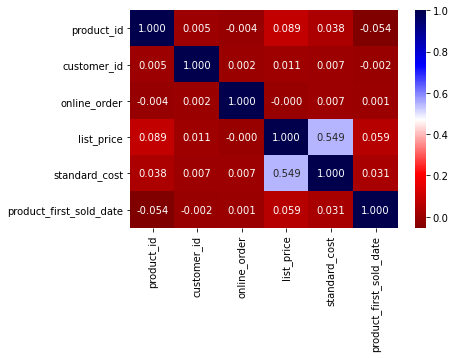

In [49]:
heatmap = sns.heatmap(clean_trans.corr(), cmap = "seismic_r", annot=True, fmt=".3F")

In [50]:
clean_trans.to_excel("Transactions.xlsx", index = True)

miss_trans.to_excel("Missing_Transactions.xlsx", index = True)

### New Customer List Data exploration

In [51]:
newcust_l.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.48,0.60,0.75,0.6375,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.44,0.44,0.55,0.4675,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.82,0.82,0.82,0.8200,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.40,0.50,0.50,0.5000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.72,0.72,0.90,0.9000,4,4,1.703125


In [52]:
newcust_l.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [53]:
newcust_l.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [54]:
newcust_l.last_name.fillna("Doe", inplace = True)

In [55]:
newcust_l.job_industry_category.value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [56]:
newcust_l_missing = newcust_l[newcust_l[["DOB","job_title","job_industry_category"]].isnull().any(axis = 1)]

newcust_l_missing

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,...,NSW,Australia,8,0.70,0.8750,1.093750,1.093750,16,16,1.562500
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,...,QLD,Australia,4,0.50,0.5000,0.500000,0.425000,23,23,1.500000
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,N,Yes,...,NSW,Australia,8,0.72,0.9000,0.900000,0.900000,23,23,1.500000
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,...,QLD,Australia,4,0.47,0.4700,0.470000,0.399500,26,26,1.468750
29,Rhona,De Freyne,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,...,VIC,Australia,10,0.44,0.4400,0.550000,0.550000,30,30,1.460938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,Amby,Bodega,Male,63,1968-06-12,Recruiter,NaN,Affluent Customer,N,Yes,...,VIC,Australia,6,0.88,1.1000,1.100000,1.100000,974,974,0.425000
980,Tyne,Anshell,Female,71,1992-04-08,Mechanical Systems Engineer,NaN,Mass Customer,N,Yes,...,NSW,Australia,8,0.86,1.0750,1.075000,0.913750,979,979,0.416500
983,Augusta,Munns,Female,5,1951-09-17,Quality Control Specialist,NaN,Mass Customer,N,No,...,NSW,Australia,11,1.03,1.0300,1.287500,1.094375,983,983,0.410000
984,Pauline,Dallosso,U,82,NaT,Desktop Support Technician,IT,Affluent Customer,N,Yes,...,NSW,Australia,10,0.75,0.9375,1.171875,1.171875,985,985,0.408000


In [57]:
newcust_l.duplicated().sum()

0

In [58]:
newcust_l.drop(newcust_l_missing.index, inplace = True)

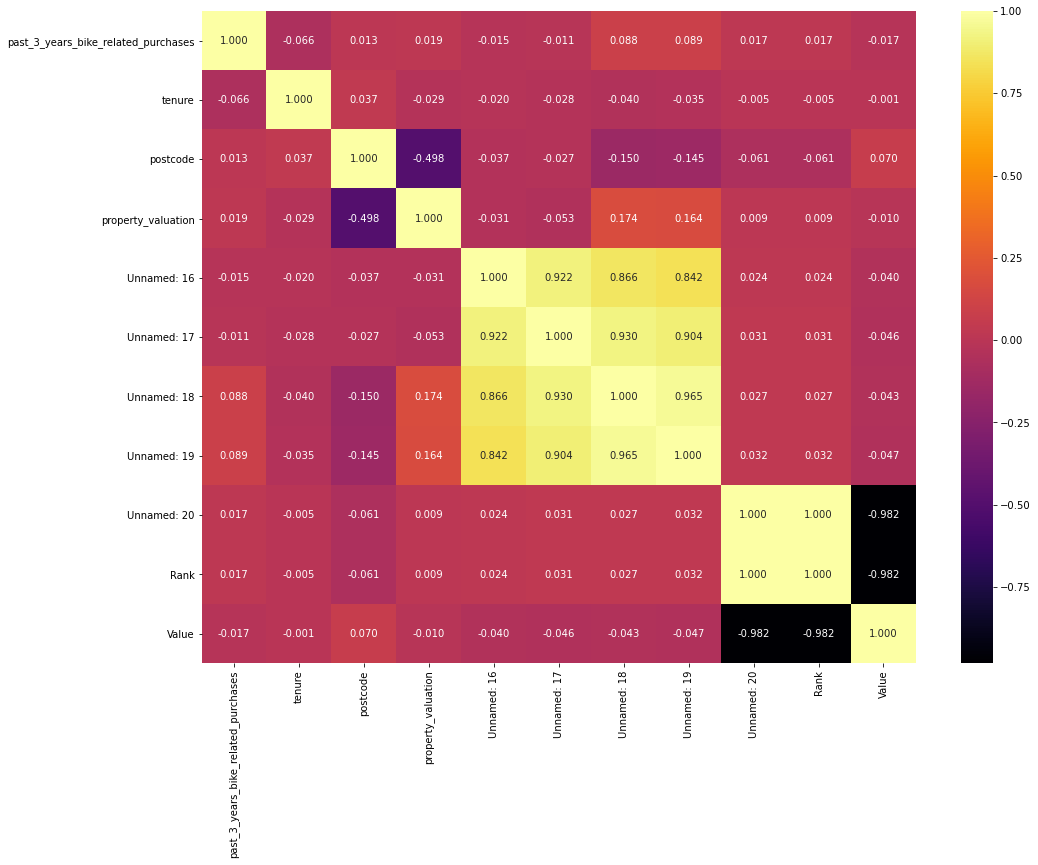

In [59]:
fig, ax = plt.subplots(figsize=(16, 12))

heatmap = sns.heatmap(newcust_l.corr(), cmap = "inferno", annot=True, fmt=".3F")

In [60]:
newcust_l.to_excel("New_Customer_List_Clean.xlsx", index = False)
newcust_l_missing.to_excel("New_Customer_List_Missing.xlsx", index = False)

### Customer Address Data Exploration

In [61]:
cust_a

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [62]:
cust_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [63]:
cust_a.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [64]:
cust_a.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [65]:
cust_a = cust_a.set_index("customer_id")

In [66]:
cust_a.sample(10)

,address,postcode,state,country,property_valuation
customer_id,,,,,
3404,91 Charing Cross Way,2100,NSW,Australia,11
1634,49932 Messerschmidt Point,2138,NSW,Australia,11
3389,024 Onsgard Alley,3134,VIC,Australia,9
1303,0917 Golf View Parkway,4217,QLD,Australia,1
2787,3 Cordelia Place,3018,VIC,Australia,9
1866,007 Canary Circle,2047,NSW,Australia,12
3318,2 Donald Crossing,2880,NSW,Australia,1
908,352 Bonner Crossing,3084,VIC,Australia,8
275,07158 Roth Pass,2165,NSW,Australia,4


In [67]:
cust_a.duplicated().sum()

0

In [68]:
cust_a.to_excel("Customer_Address.xlsx",  index=True)